# Merging and exploration of individual stock beta values from Wharton databases.
1) Import large csv files then merge on premno (A type of stock ID).
2) Pivot table based on date.
3) Convert date column to 'datetime'
4) Create histogram with quarter (3 month) sized bins. How many companies have beta values here?
5) How many companies are there in each bin with beta and/or price > 0? Can I remove companies with negative betas?
6) What is the largest market cap for each date?
7) Based on this I may be able to safely calculate historical weighted average beta (weighted by market cap)


In [1]:
# TODO: I need to fix the datetime conversion, then I can experiment with plotting.

# Import python classes
import numpy as np
import pandas as pd


In [2]:
mcap_raw = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\datasets\market cap\market_cap.csv")
display(mcap_raw.head())
betas_raw = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\datasets\market_betas_all_data\raw_market_betas.csv")
display(betas_raw.head())
# permno_ticker_translations = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\datasets\Permno_ticker_translations\permno_ticker_translations.csv")
# display(permno_ticker_translations.head())

# what are the shapes of these dataframes?
print(mcap_raw.shape)
print(betas_raw.shape)

,PERMNO,date,TICKER,COMNAM,PRC,SHROUT
0,10000,12/31/1985,NaN,NaN,NaN,NaN
1,10000,01/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.3750,3680.0
2,10000,02/28/1986,OMFGA,OPTIMUM MANUFACTURING INC,-3.2500,3680.0
3,10000,03/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.4375,3680.0
4,10000,04/30/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.0000,3793.0


,permno,yyyymmdd,bswa32,sd0111
0,10000,1986-01-31,1.04,NaN
1,10000,1986-02-28,0.53,NaN
2,10000,1986-03-31,0.55,NaN
3,10000,1986-04-30,0.33,NaN
4,10000,1986-05-30,0.26,NaN


(4169888, 6)
(3676436, 4)


In [3]:
# The mcap_raw has more rows so let's use it as the baseline.
# I need to put dates in the same format before merging on date and permno
print(type(mcap_raw['date'].loc[0]))
print(mcap_raw['date'].loc[0])
print(type(betas_raw['yyyymmdd'].loc[0]))
print(betas_raw['yyyymmdd'].loc[0])

def mcap_date_convert(mcap_raw): # assumes input is mm-dd-yyyy , convert to yyyy-mm-dd.
    dates_converted = []
    for date in mcap_raw['date']:
        #print(date.split('-'))
        mm, dd, yyyy = date.split('/') # split on dash.
        dates_converted.append(yyyy+'-'+mm+'-'+dd)
    return dates_converted

mcap_raw['date'] = mcap_date_convert(mcap_raw)
display(mcap_raw.head())
# mcaps_and_betas_raw = mcap_raw.merge(betas_raw, left_on='PERMNO', right_on = "permno", how='left') # mer
# display(mcaps_and_betas_raw.head())

<class 'str'>
12/31/1985
<class 'str'>
1986-01-31


,PERMNO,date,TICKER,COMNAM,PRC,SHROUT
0,10000,1985-12-31,NaN,NaN,NaN,NaN
1,10000,1986-01-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.3750,3680.0
2,10000,1986-02-28,OMFGA,OPTIMUM MANUFACTURING INC,-3.2500,3680.0
3,10000,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.4375,3680.0
4,10000,1986-04-30,OMFGA,OPTIMUM MANUFACTURING INC,-4.0000,3793.0


In [4]:
# mcap_betas_raw = pd.merge(mcap_raw, betas_raw, how='left', left_on=['PERMNO','date'], right_on = ['permno','yyyymmdd']) #leftmerge where perno and date are equal
# display(mcap_betas_raw.head())

# Merge to only include values from the smaller dataset (betas dataset)
mcap_betas_raw = pd.merge(betas_raw, mcap_raw, how='left', left_on= ['permno','yyyymmdd'], right_on = ['PERMNO','date']) #leftmerge where perno and date are equal
display(mcap_betas_raw.head())
print(mcap_betas_raw.shape)

,permno,yyyymmdd,bswa32,sd0111,PERMNO,date,TICKER,COMNAM,PRC,SHROUT
0,10000,1986-01-31,1.04,NaN,10000.0,1986-01-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.37500,3680.0
1,10000,1986-02-28,0.53,NaN,10000.0,1986-02-28,OMFGA,OPTIMUM MANUFACTURING INC,-3.25000,3680.0
2,10000,1986-03-31,0.55,NaN,10000.0,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.43750,3680.0
3,10000,1986-04-30,0.33,NaN,10000.0,1986-04-30,OMFGA,OPTIMUM MANUFACTURING INC,-4.00000,3793.0
4,10000,1986-05-30,0.26,NaN,10000.0,1986-05-30,OMFGA,OPTIMUM MANUFACTURING INC,-3.10938,3793.0


(3676436, 10)


In [5]:
mcap_betas = mcap_betas_raw[['PERMNO', 'date', 'TICKER', 'COMNAM', 'PRC', 'SHROUT','bswa32']] # only keep columns of interest
# convert string date to datetime for plotting
# mcap_betas['date'] = 
mcap_betas['date'] = pd.to_datetime(mcap_betas['date'], format='%Y-%m-%d' , errors='ignore') # convert 'date' to datetime so plotting can be done.
# print(type(mcap_betas['date'].loc[0]))
print(mcap_betas['date'].dtype)
display(mcap_betas.head())

datetime64[ns]


C:\Users\Edmund\AppData\Local\Temp\ipykernel_13544\3247155042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcap_betas['date'] = pd.to_datetime(mcap_betas['date'], format='%Y-%m-%d' , errors='ignore') # convert 'date' to datetime so plotting can be done.


,PERMNO,date,TICKER,COMNAM,PRC,SHROUT,bswa32
0,10000.0,1986-01-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.37500,3680.0,1.04
1,10000.0,1986-02-28,OMFGA,OPTIMUM MANUFACTURING INC,-3.25000,3680.0,0.53
2,10000.0,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.43750,3680.0,0.55
3,10000.0,1986-04-30,OMFGA,OPTIMUM MANUFACTURING INC,-4.00000,3793.0,0.33
4,10000.0,1986-05-30,OMFGA,OPTIMUM MANUFACTURING INC,-3.10938,3793.0,0.26


In [6]:
# make histograms to get a sense of the price, shares outstanding, and betas:
# mcap_betas.plot(x = 'date', y = 'PRC') # Why are prices negative?
# mcap_betas.plot(x = 'date', y = 'SHROUT')

print(len(mcap_betas)) # how many rows in the whole dataframe? 
# What if we remove rows where PRC and SHROUT are NaN?
mb_no_nan = mcap_betas.dropna(subset=['PRC','SHROUT'])
print(len(mb_no_nan))
# What is the minimum 'SHROUT' value?
print(min(mb_no_nan['SHROUT']))
# Negative PRC values actually represent negative bid/ask averages. For this analysis I will just remove the negative signs
mb_no_nan['PRC'] = mb_no_nan['PRC'].abs()

# now include column for market cap (price * shares outstanding)
mb_no_nan['MCAP'] = mb_no_nan['PRC'] * mb_no_nan['SHROUT']
display(mb_no_nan.head())

3676436
3650036
0.0


C:\Users\Edmund\AppData\Local\Temp\ipykernel_13544\2939315058.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_no_nan['PRC'] = mb_no_nan['PRC'].abs()
C:\Users\Edmund\AppData\Local\Temp\ipykernel_13544\2939315058.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_no_nan['MCAP'] = mb_no_nan['PRC'] * mb_no_nan['SHROUT']


,PERMNO,date,TICKER,COMNAM,PRC,SHROUT,bswa32,MCAP
0,10000.0,1986-01-31,OMFGA,OPTIMUM MANUFACTURING INC,4.37500,3680.0,1.04,16100.00000
1,10000.0,1986-02-28,OMFGA,OPTIMUM MANUFACTURING INC,3.25000,3680.0,0.53,11960.00000
2,10000.0,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,4.43750,3680.0,0.55,16330.00000
3,10000.0,1986-04-30,OMFGA,OPTIMUM MANUFACTURING INC,4.00000,3793.0,0.33,15172.00000
4,10000.0,1986-05-30,OMFGA,OPTIMUM MANUFACTURING INC,3.10938,3793.0,0.26,11793.87834


(3650036, 8)


,date,PERMNO
0,1975-01-31,4876
1,1975-02-28,4885
2,1975-03-31,4896
3,1975-04-30,4907
4,1975-05-30,4894


540


<AxesSubplot:xlabel='date'>

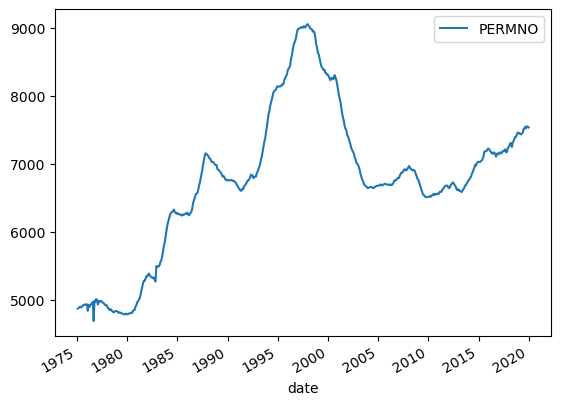

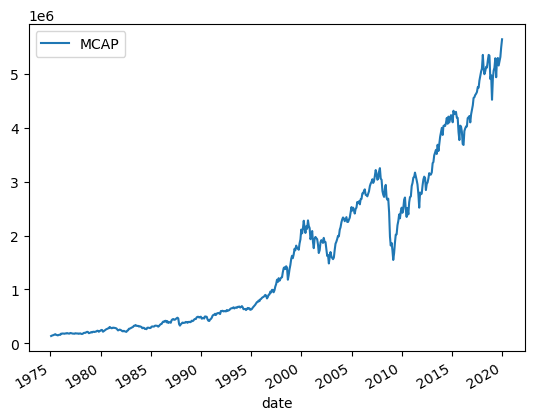

In [7]:
print(mb_no_nan.shape)
# Is there a gradual increase in the number of public companies for each date?
company_count = mb_no_nan[['date','PERMNO']].groupby(by = ['date'], as_index = False).count()
display(company_count.head())
company_count.plot(x = 'date', y = 'PERMNO')
print(len(company_count))
# Is there a gradual increase in market cap for each date?
mean_mcap = mb_no_nan[['date','MCAP']].groupby(by = ['date'], as_index = False).mean()
mean_mcap.plot(x = 'date', y = 'MCAP')


Min number of companies is just under 5000, max is over 9000. There are enough companies at each timestep to get a good average for beta.
Average market cap mostly increases gradually, but there may be spikes during recessions. This might be an interesting variable to study.
What is the distribution of market cap? Should we exclude companies with extremely high maket cap that will skew the average?

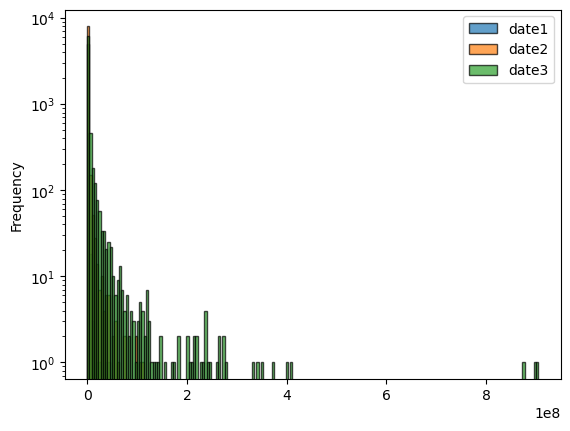

In [9]:
#
mcap_dist1 = mb_no_nan['MCAP'][mb_no_nan['date'] == company_count['date'].iloc[25]]
# plot1 = mcap_dist1.hist(log = True, edgecolor='black', bins=50)
# plot1.show()

mcap_dist2 = mb_no_nan['MCAP'][mb_no_nan['date'] == company_count['date'].iloc[250]]
# mcap_dist2.hist(log = True, edgecolor='black', bins=50)

mcap_dist3 = mb_no_nan['MCAP'][mb_no_nan['date'] == company_count['date'].iloc[530]]
# mcap_dist3.hist(log = True, edgecolor='black', bins=50)

mcap_hist_df = pd.DataFrame({'date1':mcap_dist1, 'date2':mcap_dist2,'date3':mcap_dist3})
ax = mcap_hist_df.plot.hist(log = True, edgecolor='black', alpha=0.7, bins=200)

In [10]:
print(max(mcap_dist3))
print(np.mean(mcap_dist3))
print(np.median(mcap_dist3))

904128040.0
5118391.519087699
394169.33999999997


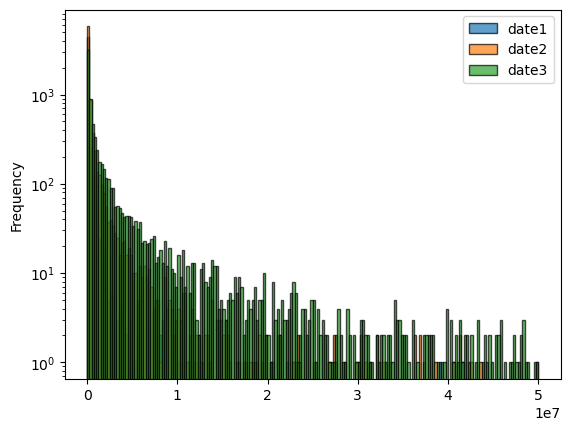

In [12]:
# Keep digging into this. lets just look at companies with market cap less than 5e7:
mcap_low_thresh = mb_no_nan[mb_no_nan['MCAP'] <= 5e7]
mcap_dist1 = mcap_low_thresh['MCAP'][mb_no_nan['date'] == company_count['date'].iloc[25]]
# plot1 = mcap_dist1.hist(log = True, edgecolor='black', bins=50)
# plot1.show()

mcap_dist2 = mcap_low_thresh['MCAP'][mb_no_nan['date'] == company_count['date'].iloc[250]]
# mcap_dist2.hist(log = True, edgecolor='black', bins=50)

mcap_dist3 = mcap_low_thresh['MCAP'][mb_no_nan['date'] == company_count['date'].iloc[530]]
# mcap_dist3.hist(log = True, edgecolor='black', bins=50)

mcap_hist_df = pd.DataFrame({'date1':mcap_dist1, 'date2':mcap_dist2,'date3':mcap_dist3})
ax = mcap_hist_df.plot.hist(log = True, edgecolor='black', alpha=0.7, bins=200)

<AxesSubplot:xlabel='date'>

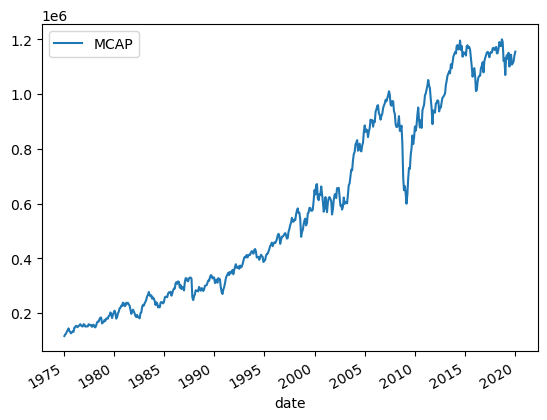

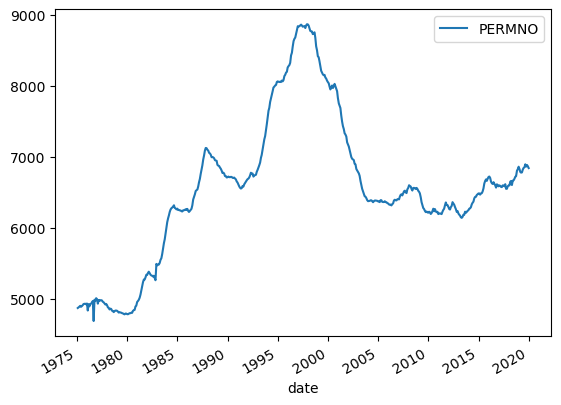

In [17]:
# The majority of stocks have mcap less than 1e7. I will exclude other stocks then see what the average mcap over time looks like:
mean_low_mcap = mb_no_nan[['date','MCAP']][mb_no_nan['MCAP'] <= 1e7].groupby(by = ['date'], as_index = False).mean()
mean_low_mcap.plot(x = 'date', y = 'MCAP')

# Let's also look at company count for low mcap stocks:
company_count_low_mcap = mb_no_nan[['date','PERMNO']][mb_no_nan['MCAP'] <= 1e7].groupby(by = ['date'], as_index = False).count()
#display(company_count.head())
company_count_low_mcap.plot(x = 'date', y = 'PERMNO')

# company_count_low_mcap = mb_no_nan[['date','PERMNO']][mb_no_nan['MCAP'] <= 1e7].groupby(by = ['date'], as_index = False).count()
# company_count_low_mcap.hist(log = True, edgecolor='black', bins=50)



540


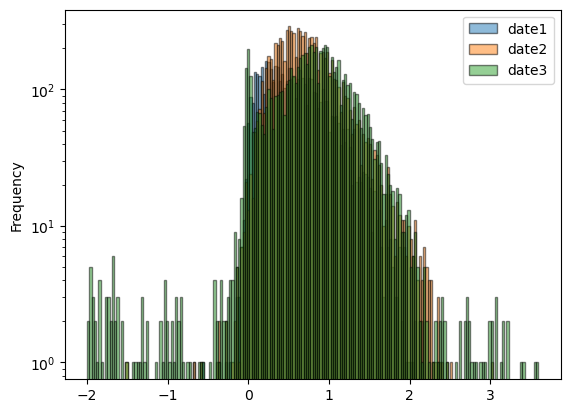

In [22]:
# finally lets look at a histogram of beta values for low mcap stocks. How are betas distributed? and are there outliers?
print(len(company_count['date'])) # how many dates do I have to work with?
beta_dist1 = mcap_low_thresh['bswa32'][mb_no_nan['date'] == company_count['date'].iloc[25]]
beta_dist2 = mcap_low_thresh['bswa32'][mb_no_nan['date'] == company_count['date'].iloc[250]]
beta_dist3 = mcap_low_thresh['bswa32'][mb_no_nan['date'] == company_count['date'].iloc[530]]
beta_hist_df = pd.DataFrame({'date1':beta_dist1, 'date2':beta_dist2,'date3':beta_dist3})
ax = beta_hist_df.plot.hist(log = True, edgecolor='black', alpha=0.5, bins=200)

<AxesSubplot:xlabel='date'>

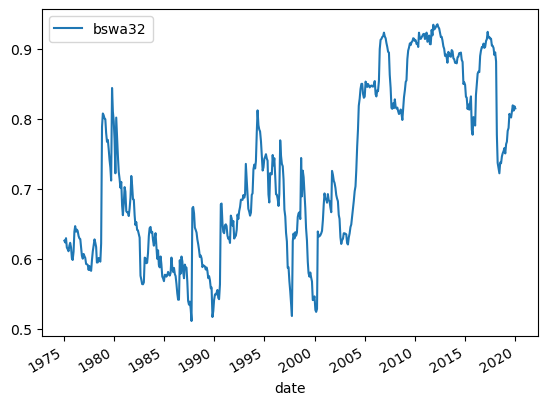

In [23]:
# Now let's look at average beta and weighted average beta:
'''
1) Get mcap weight for each stock on each date. weight = mcapi/sum(mcap)
2) make new column (weighted beta) multiplying each beta by its weight
3) finally group by date then take the sum o the weighted betas. This is the weighted aveage beta!
4) decompose WAB to include the trend component, then take gradient to get velocity and acceleration.
5) Export it all to csv, to be included in the final dataframe later.
'''
mean_beta = mcap_low_thresh[['date','bswa32']].groupby(by = ['date'], as_index = False).mean()
mean_beta.plot(x = 'date', y = 'bswa32')